Choi and Varian paper proposed how Google trends can be used to create predictive models. Ran the example provided in the appendix of paper: o Extracted google trends data from gtrendsR R package provided the category as “Automotive/Vehicle Brands/Ford”, from and to time as “2004-01-01 2008-08-30” and type of queries data to be required.  o GoogleTrendsData had "date" and "hits", it is found that search hits are declined with year.  
0 0.5 1 1.5 2 2.5 3 3.5 4 4.5 5
m1norm_frq_2010 m1norm_frq_2011 m1norm_frq_2012
0
5
10
15
20
m2norm_frq_2010 m2norm_frq_2011 m2norm_frq_2012
5 October 2018 
5 
 
o Ford monthly sales data for the given interval is generated as well. After plotting, it showed that sales were at the peaks during March and April months every year and google trends data also supporting it well. https://public.tableau.com/views/ford_sales_data_analysis/seasonalitycheck?:embed=y&:display_count=yes& publish=yes 
 
o Added a row to forecast next month in ford sales dataframe.  o Corrected the Date format to “yyyy-mm-dd” for both sales and google trends data then merged sales data with google trends data. o Time lag is defined for ford sales dataframe between the research query hits provided in trends data and sales data i.e when purchase is done. o Data divided for fitting and prediction. o Performed Exploratory Data Analysis - Testing Autocorrelation & Seasonality with ACF and Ljung-box graph plotted. In Acf the min-max boundaries on crossed on 4 instances out of 15 by small distance. Both showed that residuals forecast errors are close to 0 so not much correlation.  Ljung-box given  P-value = 0.3334 that’s small correlation. o Pearson product-moment correlation is performed to check association between data points calculated p-value = 0.3 (round fig) small correlation for all 3 trends that’s with time lag 0, +1 and +2. o Linear model fitting is defined and summary plotted to check interquartile ranges, error and degree of freedom employed by model.  o Predict is called for the next month sales provided trained model and data. 
 
predict.fit = predict(fit, newdata=dat2, se.fit=TRUE show(dat2) ##          month  sales    s1     s12  trends1 trends2 trends3 ## 240  2008-08-01  39.502  67.494  42.502    68     66      68 
 
I would have considered other metrics as well which google trends provides   Geographically i.e. at continent or countrywise how the sales have changed over the years.   Whether any other companies have launched similar specs model as Ford which could cut some sales.  Is there new product line Ford is introducing which will target the car owners driving similar car of other company that will turn into profit.  Stock Market ups and downs of Ford stock during that interval of time. 
 
Once the models are ready will calculate Mean absolute error from the predictions to evaluate the models. So will have idea about over predicting and under predicting models. 

In [21]:
library(gtrendsR)
library(reshape2)
library(ggplot2)


In [4]:

ford_trends_dat = gtrends(c("Ford"), gprop = "web", time = "2004-01-01 2008-08-30")[[1]]
ford_trends_dat = dcast(ford_trends_dat, date ~ keyword + geo, value.var = "hits")
colnames(ford_trends_dat) <- c("date","hits")
print(ford_trends_dat)

                   date hits
1   2004-01-04 01:00:00   91
2   2004-01-11 01:00:00   87
3   2004-01-18 01:00:00   87
4   2004-01-25 01:00:00   84
5   2004-02-01 01:00:00   84
6   2004-02-08 01:00:00   85
7   2004-02-15 01:00:00   82
8   2004-02-22 01:00:00   86
9   2004-02-29 01:00:00   83
10  2004-03-07 01:00:00   84
11  2004-03-14 01:00:00   82
12  2004-03-21 01:00:00   83
13  2004-03-28 02:00:00   84
14  2004-04-04 01:00:00   85
15  2004-04-11 01:00:00   86
16  2004-04-18 01:00:00   88
17  2004-04-25 01:00:00   86
18  2004-05-02 01:00:00   82
19  2004-05-09 01:00:00   82
20  2004-05-16 01:00:00   84
21  2004-05-23 01:00:00   81
22  2004-05-30 01:00:00   79
23  2004-06-06 01:00:00   82
24  2004-06-13 01:00:00   78
25  2004-06-20 01:00:00   78
26  2004-06-27 01:00:00   78
27  2004-07-04 01:00:00   79
28  2004-07-11 01:00:00   81
29  2004-07-18 01:00:00   87
30  2004-07-25 01:00:00   82
31  2004-08-01 01:00:00   85
32  2004-08-08 01:00:00   83
33  2004-08-15 01:00:00   81
34  2004-08-22

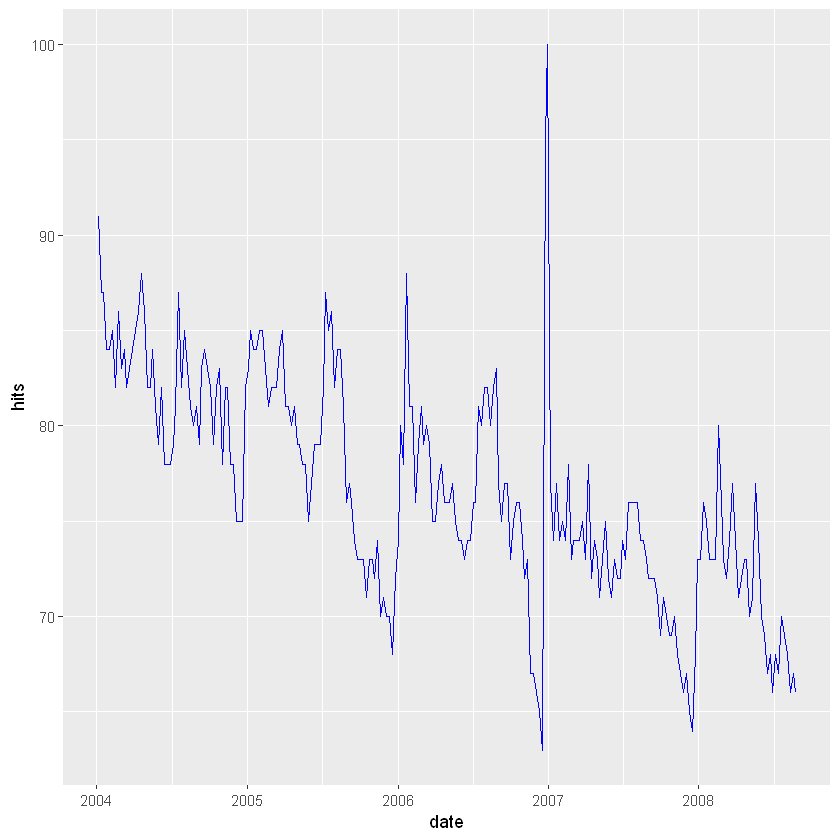

In [5]:

ggplot(data=ford_trends_dat , aes(x= date, y = hits, group= 1))+
  geom_line(color = "blue")


In [8]:
ford_sales_dat = read.csv("ford_sales_data_2004-2008.csv"); 
print(ford_sales_dat)

        month   sales
1  2004-01-01  70.599
2  2004-02-01  63.044
3  2004-03-01 137.656
4  2004-04-01  87.925
5  2004-05-01  82.412
6  2004-06-01 104.704
7  2004-07-01  83.404
8  2004-08-01  55.581
9  2004-09-01 111.174
10 2004-10-01  79.926
11 2004-11-01  78.792
12 2004-12-01  81.232
13 2005-01-01  78.185
14 2005-02-01  73.111
15 2005-03-01 137.014
16 2005-04-01  88.979
17 2005-05-01  86.634
18 2005-06-01 100.793
19 2005-07-01  82.691
20 2005-08-01  56.879
21 2005-09-01 108.559
22 2005-10-01  75.219
23 2005-11-01  77.513
24 2005-12-01  75.854
25 2006-01-01  84.652
26 2006-02-01  70.261
27 2006-03-01 160.395
28 2006-04-01  78.072
29 2006-05-01  90.991
30 2006-06-01  97.833
31 2006-07-01  75.638
32 2006-08-01  52.502
33 2006-09-01  92.677
34 2006-10-01  79.538
35 2006-11-01  80.704
36 2006-12-01  70.228
37 2007-01-01  86.028
38 2007-02-01  76.771
39 2007-03-01 135.997
40 2007-04-01  88.968
41 2007-05-01  91.449
42 2007-06-01  93.435
43 2007-07-01  77.494
44 2007-08-01  42.502
45 2007-09

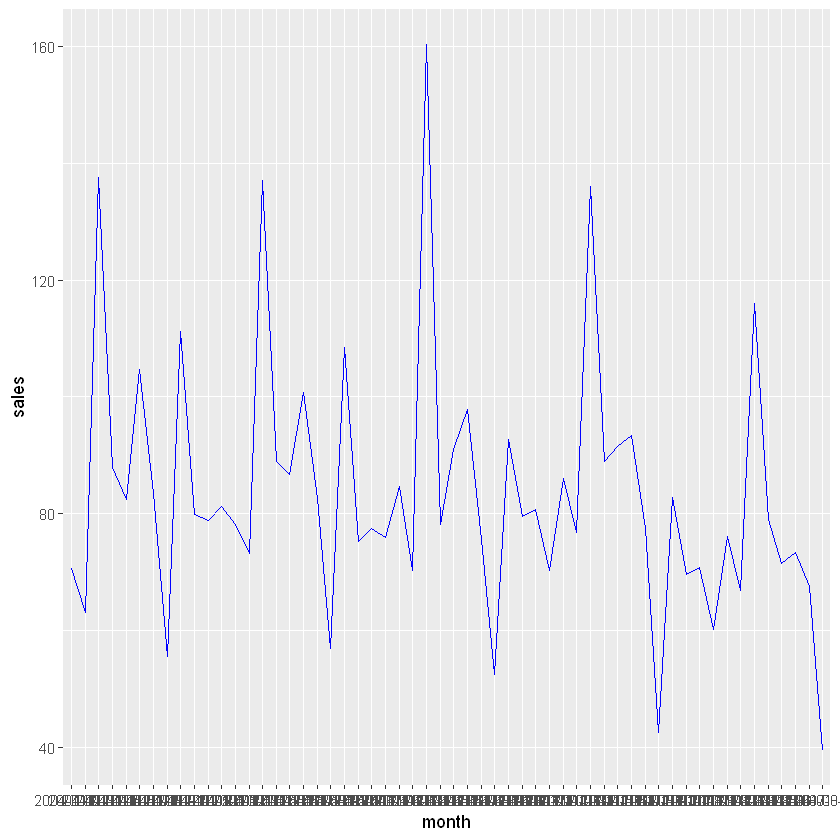

In [9]:

ggplot(data=ford_sales_dat , aes(x= month, y = sales, group= 1))+
  geom_line(color = "blue")

In [10]:
ford_sales_dat$month = as.Date(ford_sales_dat$month)

##### get ready for the forecasting; 
ford_sales_dat = rbind(ford_sales_dat, ford_sales_dat[nrow(ford_sales_dat), ]); 
ford_sales_dat[nrow(ford_sales_dat), 'month'] = as.Date('2008-09-01'); 
ford_sales_dat[nrow(ford_sales_dat), -1] <- rep(NA,ncol(ford_sales_dat)-1);

##### Define Predictors - Time Lags; 
ford_sales_dat$s1 = c(NA, ford_sales_dat$sales[1:(nrow(ford_sales_dat)-1)]); 
ford_sales_dat$s12 = c(rep(NA, 12), ford_sales_dat$sales[1:(nrow(ford_sales_dat)-12)]);

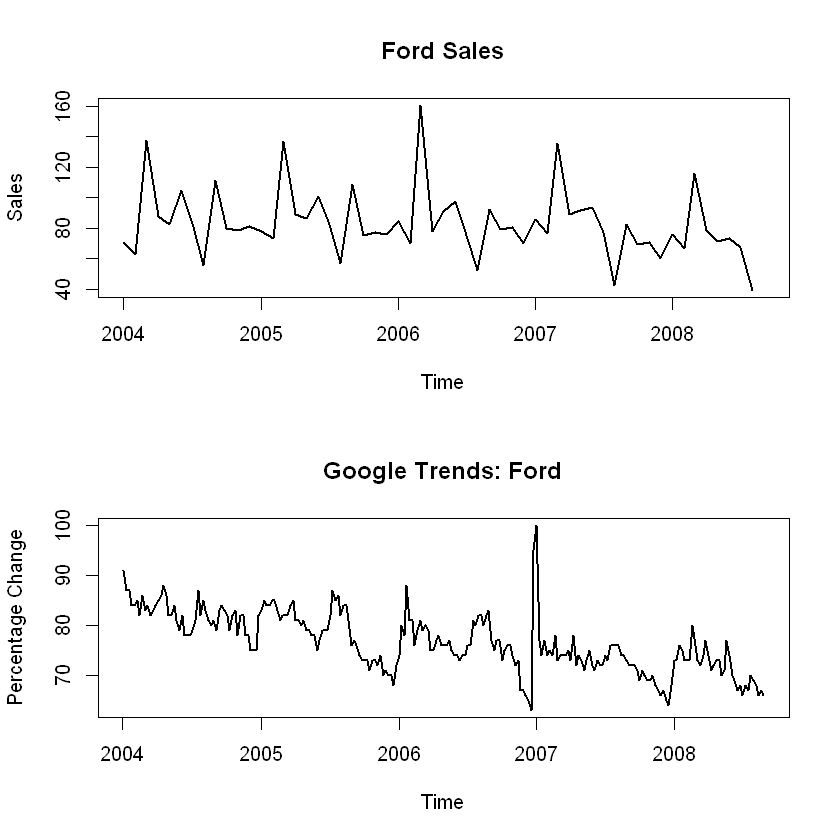

In [12]:
##### Plot Sales & Google Trends data; 
par(mfrow=c(2,1)); 
plot(sales ~ month, data= ford_sales_dat, lwd=2, type='l', main='Ford Sales', ylab='Sales', xlab='Time'); 
plot(hits ~ date, data= ford_trends_dat, lwd=2, type='l', main='Google Trends: Ford', ylab='Percentage Change', xlab='Time');


In [13]:

##### Merge Sales Data w/ Google Trends Data 
ford_trends_dat$month = as.Date(paste(substr(ford_trends_dat$date, 1, 7), '01', sep='-')) 
ford_sales_dat = merge(ford_sales_dat, ford_trends_dat);

##### Define Predictor - Google Trends 
## t.lag defines the time lag between the research and purchase. 
## 	t.lag = 0 if you want to include last week of the previous month and 
## 		1st-2nd week of the corresponding month 
## 	t.lag = 1 if you want to include 1st-3rd week of the corresponding month 
t.lag = 1; 
id = which(ford_sales_dat$month[-1] != ford_sales_dat$month[-nrow(ford_sales_dat)]); 
mdat = ford_sales_dat[id + 1, c('month', 'sales', 's1', 's12')];
mdat$trends1 = ford_sales_dat$hits[id + t.lag]; 
mdat$trends2 = ford_sales_dat$hits[id + t.lag + 1]; 
mdat$trends3 = ford_sales_dat$hits[id + t.lag + 2];

##### Divide data by two parts - model fitting & prediction 
dat1 = mdat[1:(nrow(mdat)-1), ] 
dat2 = mdat[nrow(mdat), ]


	Box-Ljung test

data:  log(dat1$sales)
X-squared = 0.93576, df = 1, p-value = 0.3334


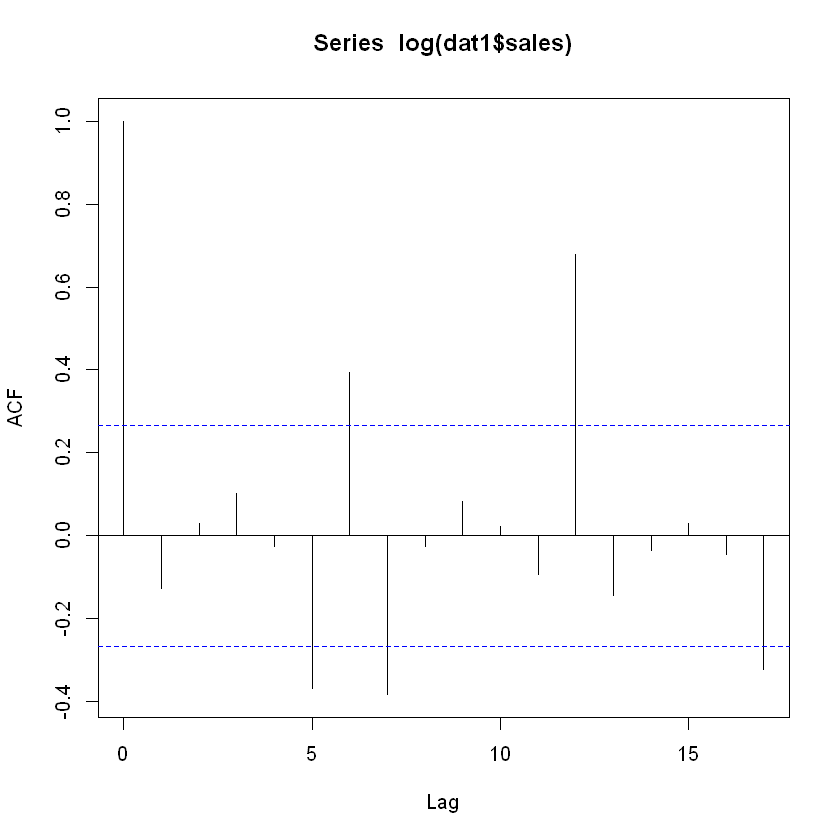

In [14]:
#### Exploratory Data Analysis 
## Testing Autocorrelation & Seasonality 
acf(log(dat1$sales)); 
Box.test(log(dat1$sales), type="Ljung-Box") 



	Pearson's product-moment correlation

data:  dat1$trends1 and log(dat1$sales)
t = 0.80315, df = 52, p-value = 0.4255
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1618651  0.3675594
sample estimates:
     cor 
0.110693 



	Pearson's product-moment correlation

data:  dat1$trends2 and log(dat1$sales)
t = 1.3269, df = 52, p-value = 0.1903
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09120735  0.42799396
sample estimates:
      cor 
0.1809729 



	Pearson's product-moment correlation

data:  dat1$trends3 and log(dat1$sales)
t = 1.3345, df = 52, p-value = 0.1878
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09017862  0.42884083
sample estimates:
     cor 
0.181976 


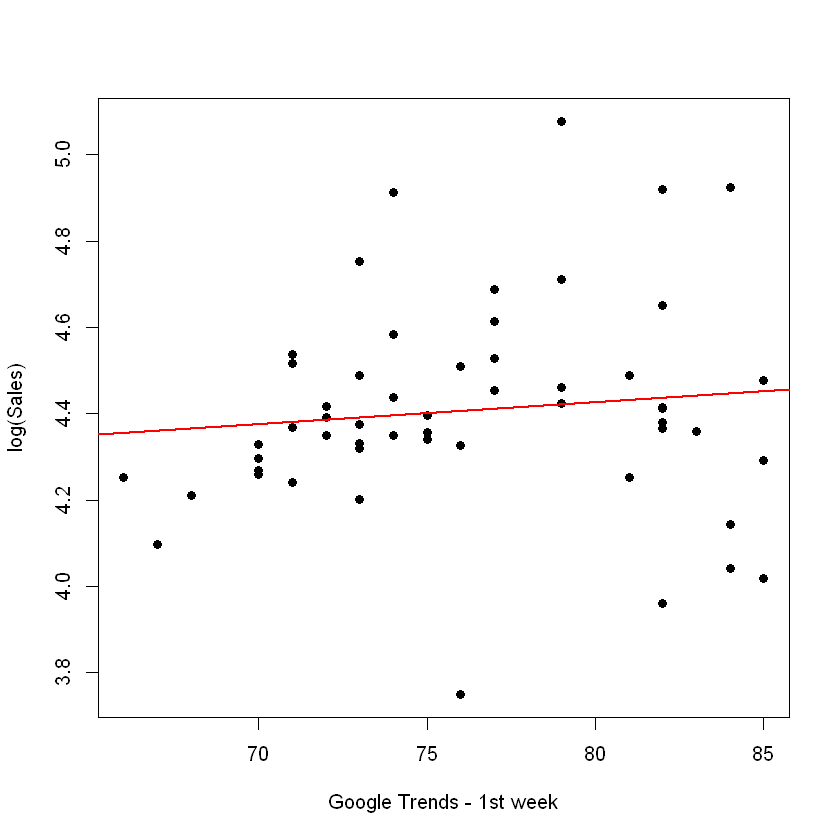

In [16]:
## Testing Correlation 
plot(y = log(dat1$sales), x = dat1$trends1, main='', pch=19,
     ylab='log(Sales)', xlab= 'Google Trends - 1st week') 
abline(lm(log(dat1$sales) ~ dat1$trends1), lwd=2, col=2) 
cor.test(y = log(dat1$sales), x = dat1$trends1) 
cor.test(y = log(dat1$sales), x = dat1$trends2) 
cor.test(y = log(dat1$sales), x = dat1$trends3)






Call:
lm(formula = log(sales) ~ log(s1) + log(s12) + trends1, data = dat1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18326 -0.06141 -0.01489  0.06180  0.18143 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.067369   0.467698  -2.282  0.02802 *  
log(s1)      0.076025   0.059415   1.280  0.20826    
log(s12)     0.979633   0.061594  15.905  < 2e-16 ***
trends1      0.010385   0.002992   3.471  0.00128 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09042 on 39 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.8693,	Adjusted R-squared:  0.8592 
F-statistic: 86.43 on 3 and 39 DF,  p-value: < 2.2e-16


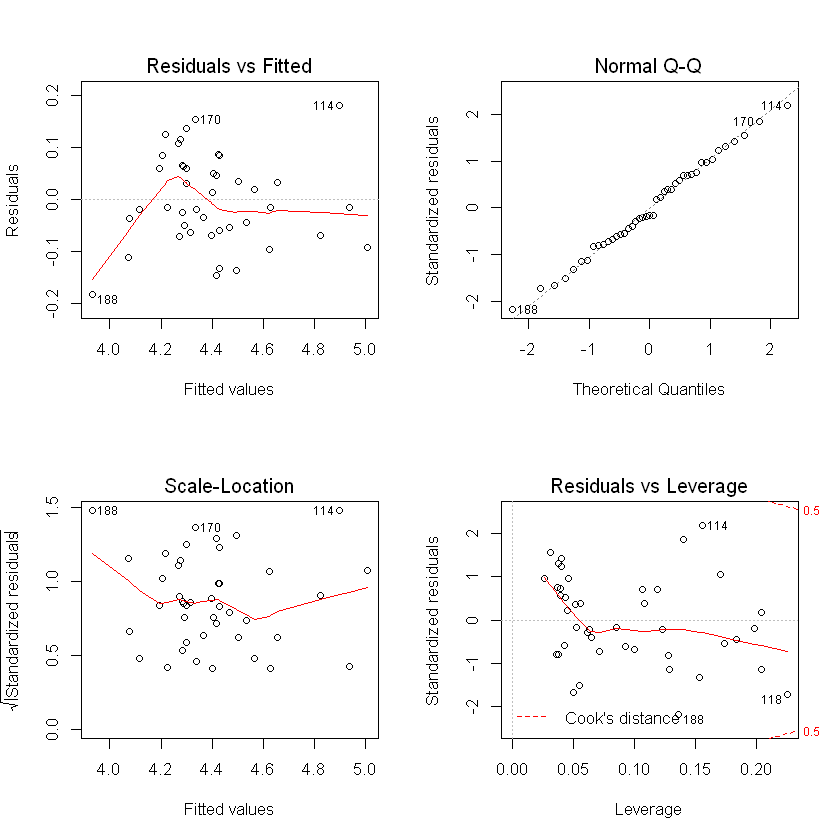

In [19]:

##### Fit Model; 
fit = lm(log(sales) ~ log(s1) + log(s12) + trends1, data=dat1); 
summary(fit)

##### Diagnostic Plot 
par(mfrow=c(2,2)); 
plot(fit)


In [20]:
#### Prediction for the next month; 
predict.fit = predict(fit, newdata=dat2, se.fit=TRUE)

In [18]:
show(dat2)

         month  sales     s1    s12 trends1 trends2 trends3
240 2008-08-01 39.502 67.494 42.502      68      66      67
